In [1]:
# main modules needed
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [2]:
df=pd.read_csv('012format_last.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(9765, 35220)

In [4]:
df.rename(columns={"Unnamed: 0": "id"},inplace=True)

In [5]:
df.head()

,id,Unnamed: 0.1,2,3,4,5,6,7,8,9,...,35210,35211,35212,35213,35214,35215,35216,35217,35218,35219
0,PI253651A,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PI347550A,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,2
2,PI408055A,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,PI408069,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,PI408169A,5,2,2,2,0,2,0,2,2,...,0,0,0,0,0,0,0,0,0,0


In [6]:
ID=[]
for idx in df['id']:
    ID.append(str(idx))

In [7]:
df.id=ID

In [8]:
## add a new varible, namely origin, as a new varible
origin=[]
for idx in df['id']:
    if idx.startswith('PI'):
        origin.append('0')
    else: 
       origin.append('2')

In [9]:
from collections import Counter
Counter(origin)

Counter({'0': 8750, '2': 1015})

In [10]:
df['origin']=origin

In [11]:
df.head()

,id,Unnamed: 0.1,2,3,4,5,6,7,8,9,...,35211,35212,35213,35214,35215,35216,35217,35218,35219,origin
0,PI253651A,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PI347550A,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,2,0
2,PI408055A,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,PI408069,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,PI408169A,5,2,2,2,0,2,0,2,2,...,0,0,0,0,0,0,0,0,0,0


In [12]:
cleaned_t = pd.read_csv('combined_ypo.csv')

In [13]:
cleaned_t.head()

,id,yield,protein,oil
0,PI103414,2.28,37.7,21.6
1,PI132215,1.84,39.7,20.4
2,PI153214,1.82,41.1,18.2
3,PI153229,1.74,38.3,19.5
4,PI153236,2.07,39.0,20.4


In [14]:
p_protein=cleaned_t[['id','protein']]

In [15]:
g_plus_pp=pd.merge(df,p_protein, left_on=df.id, right_on=p_protein.id, how='inner')

In [16]:
g_plus_pp=g_plus_pp.dropna()

In [17]:
g_plus_pp.shape

(9590, 35224)

In [18]:
g_plus_pp.head()

,key_0,id_x,Unnamed: 0.1,2,3,4,5,6,7,8,...,35213,35214,35215,35216,35217,35218,35219,origin,id_y,protein
0,PI253651A,PI253651A,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,PI253651A,42.6
1,PI347550A,PI347550A,2,0,0,0,0,0,0,0,...,0,0,0,0,2,0,2,0,PI347550A,44.7
2,PI408055A,PI408055A,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,PI408055A,46.7
3,PI408069,PI408069,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,PI408069,43.2
4,PI408169A,PI408169A,5,2,2,2,0,2,0,2,...,0,0,0,0,0,0,0,0,PI408169A,45.8


### Mathine Learning for Protein Content using Lasso

In [20]:
X=g_plus_pp.iloc[:,3:35221]

In [21]:
Y=g_plus_pp['protein']

In [22]:
 # first trait analyzed
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7672, 35218) (7672,)
(1918, 35218) (1918,)


In [23]:
print('       min   max  mean   sd')
print('Train:', y_train.min(), y_train.max(), y_train.mean(), np.sqrt(y_train.var()))
print('Test:', y_test.min(), y_test.max(), y_test.mean(), np.sqrt(y_test.var()))

       min   max  mean   sd
Train: 37.3 51.2 44.28345389205027 2.4816377453114993
Test: 37.7 51.2 44.32264830675179 2.481695778944704


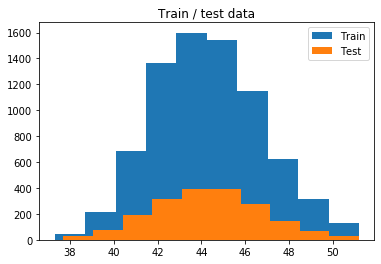

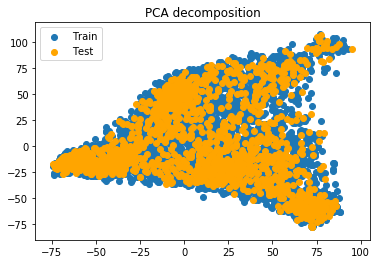

In [24]:
plt.title('Train / test data')
plt.hist(y_train, label='Train')
plt.hist(y_test, label='Test')
plt.legend(loc='best')
plt.show()

# marker PCA, use whole X with diff color for train and test
X = np.concatenate((X_train, X_test))
pca = PCA(n_components=2)
p = pca.fit(X).fit_transform(X)
Ntrain=X_train.shape[0]
plt.title('PCA decomposition')
plt.scatter(p[0:Ntrain,0], p[0:Ntrain,1], label='Train')
plt.scatter(p[Ntrain:,0], p[Ntrain:,1], label='Test', color='orange')
plt.legend(loc='best')
plt.show()

In [25]:
#  SNP preselection according to a simple GWAS
pvals = []
for i in range(X_train.shape[1]):
    b, intercept, r_value, p_value, std_err = stats.linregress(np.asarray(X_train.iloc[:,i]), np.asarray(y_train))
    pvals.append(-np.log10(p_value))
pvals = np.array(pvals)
print(len(pvals))


35218


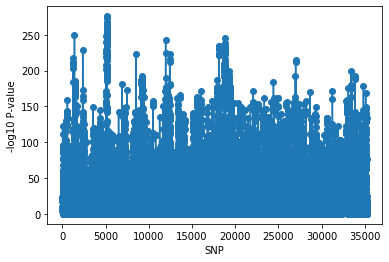

In [26]:
# plot GWAS
plt.ylabel('-log10 P-value')
plt.xlabel('SNP')
plt.plot(pvals, marker='o')
plt.show()

# select by min_P_value
# min_P_value = 4 # P = 0.0001
# snp_list = np.nonzero(pvals>min_P_value)
N_best = 5000
snp_list = pvals.argsort()[-N_best:]

# finally slice X
X_train = X_train[X_train.columns[snp_list]] 
X_test = X_test[X_test.columns[snp_list]]

In [27]:
import warnings
warnings.filterwarnings('ignore')
# Import necessary modules
from sklearn.linear_model import lasso
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import GridSearchCV, train_test_split

# Create the hyperparameter grid
a = np.linspace(0, 1, 20)
param_grid = {'alpha': a}

# Instantiate the lasso regressor: elastic_net
lasso = linear_model.Lasso()

# Setup the GridSearchCV
gm_cv=GridSearchCV(lasso,param_grid,cv=5)

# Fit it to the training data
gm_cv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned lasso alpha: {}".format(gm_cv.best_params_))
print("Tuned lasso R squared: {}".format(r2))
print("Tuned lasso MSE: {}".format(mse))

Tuned ElasticNet alpha: {'alpha': 0.05263157894736842}
Tuned ElasticNet R squared: 0.3829735006632918
Tuned ElasticNet MSE: 3.798170095603049



MSE in prediction = 3.799369014327236

Corr obs vs pred = 0.6201369643267749


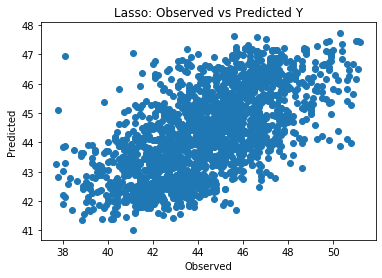

In [28]:
import sklearn.metrics as sm
# alpha is the regularization parameter
lasso = linear_model.Lasso(alpha=0.053)
lasso.fit(X_train, y_train)
y_hat = lasso.predict(X_test)

# mean squared error
mse = sm.mean_squared_error(y_test, y_hat)
print('\nMSE in prediction =',mse)

# correlation btw predicted and observed
corr = np.corrcoef(y_test,y_hat)[0,1]
print('\nCorr obs vs pred =',corr)

# plot observed vs. predicted targets
plt.title('Lasso: Observed vs Predicted Y')
plt.ylabel('Predicted')
plt.xlabel('Observed')
plt.scatter(y_test, y_hat, marker='o')
plt.show()


In [30]:
X=g_plus_pp.iloc[:,3:35221]
from sklearn.model_selection import cross_val_score
reg = lasso
# Compute 5-fold cross-validation scores: cv_scores

cv_scores = cross_val_score(reg,X[X.columns[snp_list]],Y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.31293596 0.2112357  0.29270277 0.30656707 0.50467946]
Average 5-Fold CV Score: 0.3256241901683242


In [ ]:
### Mathine Learning for Protein Content using RandomForestClassifier

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
clf = RandomForestRegressor(120)


MSE in prediction = 3.424748298119914

Corr obs vs pred = 0.6668555470229598


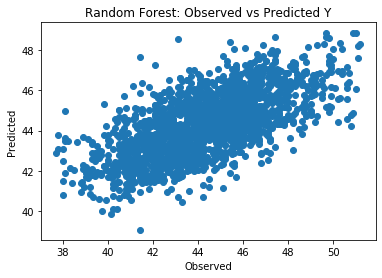

In [34]:
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

# mean squared error
mse = sm.mean_squared_error(y_test, y_hat)
print('\nMSE in prediction =',mse)

# correlation btw predicted and observed
corr = np.corrcoef(y_test,y_hat)[0,1]
print('\nCorr obs vs pred =',corr)

# plot observed vs. predicted targets
plt.title('Random Forest: Observed vs Predicted Y')
plt.ylabel('Predicted')
plt.xlabel('Observed')
plt.scatter(y_test, y_hat, marker='o')
plt.show()


In [35]:
from sklearn.model_selection import cross_val_score
reg = clf
# Compute 10-fold cross-validation scores: cv_scores

cv_scores = cross_val_score(reg,X[X.columns[snp_list]],Y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.34336957 0.28483513 0.33460592 0.36573023 0.54292591]
Average 5-Fold CV Score: 0.37429335251808415


### Mathine Learning for Oil Content

In [36]:
p_oil=cleaned_t[['id','oil']]

In [37]:
g_plus_po=pd.merge(df,p_oil, left_on=df.id, right_on=p_oil.id, how='inner')

In [38]:
g_plus_po=g_plus_po.dropna()

In [39]:
g_plus_po.head()

,key_0,id_x,Unnamed: 0.1,2,3,4,5,6,7,8,...,35213,35214,35215,35216,35217,35218,35219,origin,id_y,oil
0,PI253651A,PI253651A,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,PI253651A,18.5
1,PI347550A,PI347550A,2,0,0,0,0,0,0,0,...,0,0,0,0,2,0,2,0,PI347550A,19.8
2,PI408055A,PI408055A,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,PI408055A,18.0
3,PI408069,PI408069,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,PI408069,20.6
4,PI408169A,PI408169A,5,2,2,2,0,2,0,2,...,0,0,0,0,0,0,0,0,PI408169A,16.4


In [40]:
Y=g_plus_po['oil']

In [41]:
X=g_plus_po.iloc[:,3:35221]

In [42]:
 # first trait analyzed
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7650, 35218) (7650,)
(1913, 35218) (1913,)


In [43]:
print('       min max mean sd')
print('Train:', y_train.min(), y_train.max(), y_train.mean(), np.sqrt(y_train.var()))
print('Test:', y_test.min(), y_test.max(), y_test.mean(), np.sqrt(y_test.var()))

       min max mean sd
Train: 13.0 24.1 18.57241376062358 1.9915948185328765
Test: 13.0 24.1 18.573915810925264 2.0711370190120513


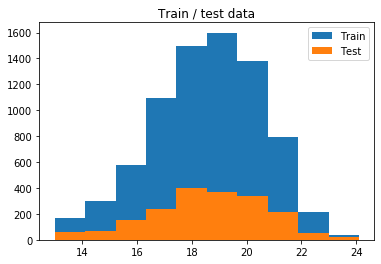

In [44]:
plt.title('Train / test data')
plt.hist(y_train, label='Train')
plt.hist(y_test, label='Test')
plt.legend(loc='best')
plt.show()


In [45]:
#  SNP preselection according to a simple GWAS
pvals = []
for i in range(X_train.shape[1]-1):
    b, intercept, r_value, p_value, std_err = stats.linregress(np.asarray(X_train.iloc[:,i]), np.asarray(y_train))
    pvals.append(-np.log10(p_value))
pvals = np.array(pvals)

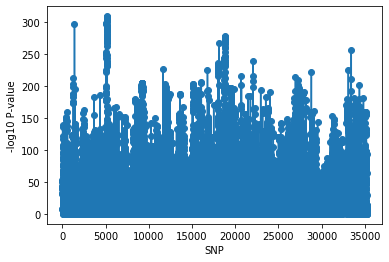

In [46]:
# plot GWAS
plt.ylabel('-log10 P-value')
plt.xlabel('SNP')
plt.plot(pvals, marker='o')
plt.show()

#  select by min_P_value
# min_P_value = 3 # P = 0.01
# snp_list = np.nonzero(pvals>min_P_value)
N_best = 5000
snp_list = pvals.argsort()[-N_best:]

# finally slice X
X_train = X_train[X_train.columns[snp_list]] 
X_test = X_test[X_test.columns[snp_list]]

In [48]:
import warnings
warnings.filterwarnings('ignore')
# Import necessary modules
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import GridSearchCV, train_test_split

## First round, I tried the  np.linspace(0, 1, 30), I found thar 0.037 is the best alpha,
## however, 0.037 was the second value to 0, so it's nessary to try value between 0 and 0.037.
# Create the hyperparameter grid
a = np.linspace(0, 0.037, 10)
param_grid = {'alpha': a}

# Instantiate the lasso regressor: elastic_net
lasso = linear_model.Lasso()

# Setup the GridSearchCV
gm_cv=GridSearchCV(lasso,param_grid,cv=5)

# Fit it to the training data
gm_cv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned lasso lpha: {}".format(gm_cv.best_params_))
print("Tuned lasso R squared: {}".format(r2))
print("Tuned lasso MSE: {}".format(mse))

Tuned lasso lpha: {'alpha': 0.012333333333333332}
Tuned lasso R squared: 0.48127584794120004
Tuned lasso MSE: 2.223960399347818



MSE in prediction = 2.285489111818253

Corr obs vs pred = 0.6851488303285074


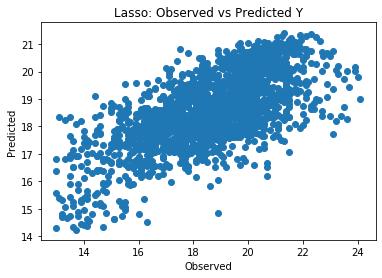

In [49]:
# alpha is the regularization parameter
lasso = linear_model.Lasso(alpha=0.025)
lasso.fit(X_train, y_train)
y_hat = lasso.predict(X_test)

# mean squared error
mse = mean_squared_error(y_test, y_hat)
print('\nMSE in prediction =',mse)

# correlation btw predicted and observed
corr = np.corrcoef(y_test,y_hat)[0,1]
print('\nCorr obs vs pred =',corr)

# plot observed vs. predicted targets
plt.title('Lasso: Observed vs Predicted Y')
plt.ylabel('Predicted')
plt.xlabel('Observed')
plt.scatter(y_test, y_hat, marker='o')
plt.show()


In [50]:

from sklearn.model_selection import cross_val_score
reg = lasso
# Compute 10-fold cross-validation scores: cv_scores
X=g_plus_po.iloc[:,3:35221]
cv_scores = cross_val_score(reg,X[X.columns[snp_list]],Y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.33175709 0.27053723 0.37156766 0.33832488 0.5807621 ]
Average 5-Fold CV Score: 0.3785897908086915


In [51]:
clf = RandomForestRegressor(100)


MSE in prediction = 2.2284804269438556

Corr obs vs pred = 0.6952744717473994


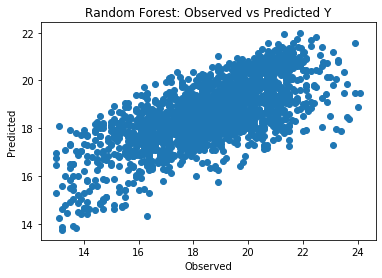

In [52]:
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

# mean squared error
mse = sm.mean_squared_error(y_test, y_hat)
print('\nMSE in prediction =',mse)

# correlation btw predicted and observed
corr = np.corrcoef(y_test,y_hat)[0,1]
print('\nCorr obs vs pred =',corr)

# plot observed vs. predicted targets
plt.title('Random Forest: Observed vs Predicted Y')
plt.ylabel('Predicted')
plt.xlabel('Observed')
plt.scatter(y_test, y_hat, marker='o')
plt.show()

In [53]:
from sklearn.model_selection import cross_val_score
reg = clf
# Compute 10-fold cross-validation scores: cv_scores

cv_scores = cross_val_score(reg,X[X.columns[snp_list]],Y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.33365784 0.26889051 0.34294245 0.32967079 0.57627477]
Average 5-Fold CV Score: 0.37028727031758824


## Mathine Learning for Yield

In [54]:
p_yield=cleaned_t[['id','yield']]

In [55]:
g_plus_py=pd.merge(df,p_yield, left_on=df.id, right_on=p_yield.id, how='inner')

In [56]:
g_plus_py=g_plus_py.dropna()

In [57]:
g_plus_py.head()

,key_0,id_x,Unnamed: 0.1,2,3,4,5,6,7,8,...,35213,35214,35215,35216,35217,35218,35219,origin,id_y,yield
0,PI253651A,PI253651A,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,PI253651A,2.43
1,PI347550A,PI347550A,2,0,0,0,0,0,0,0,...,0,0,0,0,2,0,2,0,PI347550A,3.29
2,PI408055A,PI408055A,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,PI408055A,2.41
4,PI408169A,PI408169A,5,2,2,2,0,2,0,2,...,0,0,0,0,0,0,0,0,PI408169A,1.93
6,PI416923,PI416923,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,PI416923,2.77


In [58]:
X=g_plus_py.iloc[:,3:35221]

In [59]:
Y=g_plus_py['yield']

In [60]:
 # first trait analyzed
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5632, 35218) (5632,)
(1409, 35218) (1409,)


In [61]:
print('       min max mean sd')
print('Train:', y_train.min(), y_train.max(), y_train.mean(), np.sqrt(y_train.var()))
print('Test:', y_test.min(), y_test.max(), y_test.mean(), np.sqrt(y_test.var()))

       min max mean sd
Train: 0.03 4.958 2.2137421875000034 0.9844113921344034
Test: 0.08 4.947 2.1698630234208656 0.9933125597259506


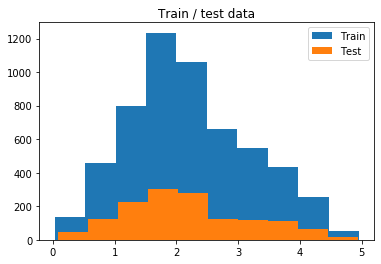

In [62]:
plt.title('Train / test data')
plt.hist(y_train, label='Train')
plt.hist(y_test, label='Test')
plt.legend(loc='best')
plt.show()



In [63]:
#  SNP preselection according to a simple GWAS
pvals = []
for i in range(X_train.shape[1]):
    b, intercept, r_value, p_value, std_err = stats.linregress(np.asarray(X_train.iloc[:,i]), np.asarray(y_train))
    pvals.append(-np.log10(p_value))
pvals = np.array(pvals)

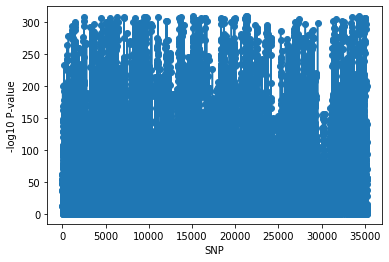

In [64]:
# plot GWAS
plt.ylabel('-log10 P-value')
plt.xlabel('SNP')
plt.plot(pvals, marker='o')
plt.show()

# select by min_P_value
min_P_value = 3 # P = 0.001
snp_list = np.nonzero(pvals>min_P_value)

# finally slice X
X_train = X_train[X_train.columns[snp_list]] 
X_test = X_test[X_test.columns[snp_list]]

In [65]:
# Import necessary modules
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import GridSearchCV, train_test_split

# Create the hyperparameter grid
a = np.linspace(0, 0.037, 10)
param_grid = {'alpha': a}

# Instantiate the lasso regressor: elastic_net
lasso = linear_model.Lasso()

# Setup the GridSearchCV
gm_cv=GridSearchCV(lasso,param_grid,cv=5)

# Fit it to the training data
gm_cv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned lasso alpha: {}".format(gm_cv.best_params_))
print("Tuned lasso R squared: {}".format(r2))
print("Tuned lasso MSE: {}".format(mse))

Tuned lasso alpha: {'alpha': 0.008222222222222221}
Tuned lasso R squared: 0.7380375792869482
Tuned lasso MSE: 0.25828697761825675



MSE in prediction = 0.25824271621629263

Corr obs vs pred = 0.8594938992764674


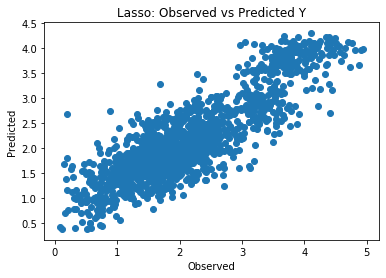

In [66]:
## Use the best parameter from the above grid-search, namely: 'alpha'= 0.008222
# alpha is the regularization parameter
lasso = linear_model.Lasso(alpha=0.0082)
lasso.fit(X_train, y_train)
y_hat = lasso.predict(X_test)

# mean squared error
mse = mean_squared_error(y_test, y_hat)
print('\nMSE in prediction =',mse)

# correlation btw predicted and observed
corr = np.corrcoef(y_test,y_hat)[0,1]
print('\nCorr obs vs pred =',corr)

# plot observed vs. predicted targets
plt.title('Lasso: Observed vs Predicted Y')
plt.ylabel('Predicted')
plt.xlabel('Observed')
plt.scatter(y_test, y_hat, marker='o')
plt.show()


In [68]:
from sklearn.model_selection import cross_val_score
reg = lasso
# Compute 5-fold cross-validation scores: cv_scores
X=g_plus_py.iloc[:,3:35221]
cv_scores = cross_val_score(reg,X[X.columns[snp_list]],Y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.49986473 0.24506729 0.43588618 0.29439473 0.70027698]
Average 5-Fold CV Score: 0.43509798182578185


In [69]:
clf = RandomForestRegressor(100)


MSE in prediction = 0.25321081240340665

Corr obs vs pred = 0.8637830018481261


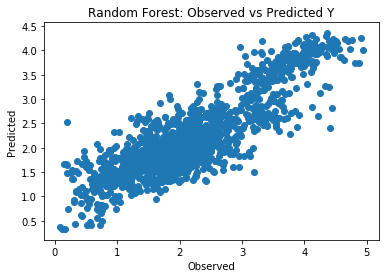

In [70]:
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

# mean squared error
mse = sm.mean_squared_error(y_test, y_hat)
print('\nMSE in prediction =',mse)


# correlation btw predicted and observed
corr = np.corrcoef(y_test,y_hat)[0,1]
print('\nCorr obs vs pred =',corr)

# plot observed vs. predicted targets
plt.title('Random Forest: Observed vs Predicted Y')
plt.ylabel('Predicted')
plt.xlabel('Observed')
plt.scatter(y_test, y_hat, marker='o')
plt.show()

In [71]:
from sklearn.model_selection import cross_val_score
reg = clf
# Compute 10-fold cross-validation scores: cv_scores

cv_scores = cross_val_score(reg,X[X.columns[snp_list]],Y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.49387147 0.24111418 0.39941971 0.21598326 0.52582469]
Average 5-Fold CV Score: 0.37524266040600696


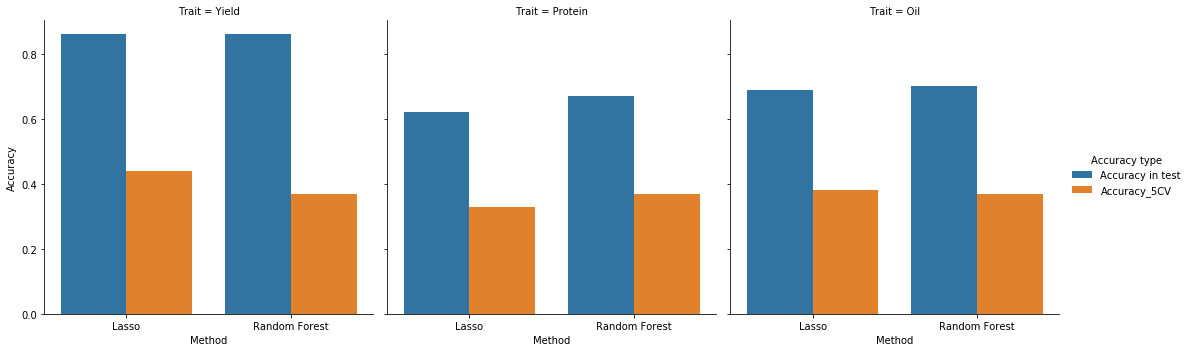

In [72]:
acc=pd.read_csv('3tt.csv')
sns.catplot(x='Method',y='Accuracy',hue='Accuracy type',data=acc,col='Trait',kind='bar')

## Random Forest method outperform linear model for all three traits